### Configuration for Running:
> Run under conda-env: py3-mujoco-v15

In [1]:
import numpy as np

#### 1. Load(Create) Data

In [2]:
x1 = range(1000)
x2 = range(1000)
y = []
for i in range(1000):
    y.append( [np.sin(x1[i])+x2[i]**2] )
    
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [3]:
import random

#### 2. Design Neural Networks for Regression

In [4]:
cost = []

In [5]:
import tensorflow as tf
import numpy as np
import random
from collections import deque

BATCH_SIZE = 32 # size of minibatch

class agent():
    def __init__(self):
        self.input_dim = 2
        self.output_dim = 1
        
        self.create_network()
        self.create_training_method()
        
        # Init session
        self.session = tf.InteractiveSession()
        self.session.run(tf.global_variables_initializer())

    def create_network(self):
        # network weights
        W1 = self.weight_variable([self.input_dim,20])
        b1 = self.bias_variable([20])
        W2 = self.weight_variable([20,self.output_dim])
        b2 = self.bias_variable([self.output_dim])
        
        # input layer
        self.input = tf.placeholder("float",[None,self.input_dim])
        
        self.target = tf.placeholder("float",[None,self.output_dim]) # OK?
        
        # hidden layers
        h_layer = tf.nn.relu(tf.matmul(self.input,W1) + b1)
        
        # output layer
        self.predict = tf.matmul(h_layer,W2) + b2
    def weight_variable(self,shape):
        initial = tf.truncated_normal(shape)
        return tf.Variable(initial)

    def bias_variable(self,shape):
        initial = tf.constant(0.01, shape = shape)
        return tf.Variable(initial)
   
    def train_network(self, in_batch, out_batch):
        self.optimizer.run(feed_dict={self.input: in_batch, self.target: out_batch})

    def create_training_method(self):        
        self.cost = tf.reduce_mean(tf.square(self.predict - self.target))
        self.optimizer = tf.train.AdamOptimizer(0.0001).minimize(self.cost)

In [6]:
my_agent = agent()

In [7]:
i2_batch = random.sample(range(1000), 32)
print( i2_batch )

[186, 595, 767, 803, 231, 589, 84, 346, 642, 638, 182, 682, 741, 387, 660, 912, 831, 129, 287, 211, 656, 588, 2, 43, 736, 655, 80, 902, 983, 482, 977, 657]


In [8]:
from tqdm import trange

#### Run this many times

In [18]:
for k in trange(100):
    for i in range(100):
        i_batch = random.sample(range(1000), 32)        
        for j in range(10):
            my_agent.train_network( np.array([x1[i_batch], x2[i_batch]]).T, y[i_batch] )

    # prediction
    y_predict = my_agent.predict.eval(feed_dict = {my_agent.input:np.array([x1[i2_batch], x2[i2_batch]]).T})

    # cost record
    cost.append( sum(abs(y_predict - y[i2_batch])) )
    # print( "cost: ", cost )

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.04it/s]


#### Plot it

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# 眼睛里要容得下沙子 Allow the sand in your view

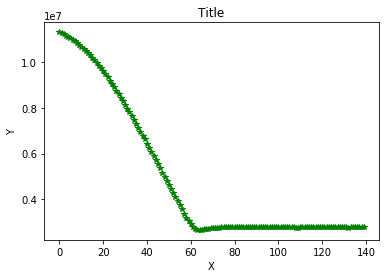

In [24]:
xypoints = cost

plt.plot(np.array(xypoints).reshape(-1), 'g*')#, label='--'
plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(loc='upper right')
plt.show()

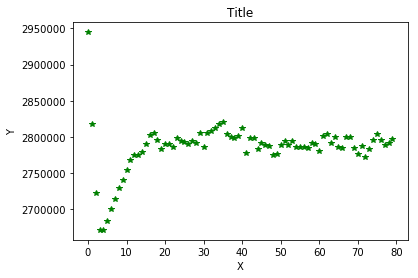

In [25]:
xypoints = cost[60:]

plt.plot(np.array(xypoints).reshape(-1), 'g*')#, label='--'
plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(loc='upper right')
plt.show()

In [26]:
cost[-10:]

[array([ 2777129.19392969]),
 array([ 2786934.00154688]),
 array([ 2772540.82295801]),
 array([ 2784024.27266504]),
 array([ 2795726.65450098]),
 array([ 2804664.44771387]),
 array([ 2795387.3180752]),
 array([ 2788403.08540918]),
 array([ 2791095.02303125]),
 array([ 2796766.20827295])]